## Projeto
  
O projeto desde módulo será uma aplicação prática do conteúdo de Técnicas de Programação I no python.  
  
**Objetivo**  
Realizar um EDA (Exploratory Data Analysis) com os conhecimentos obtidos até o momento (Pandas e Numpy). 
  
**Base de Dados**  
Cada grupo será responsável por buscar uma base de dados de seu interesse  
Dica: [Kaggle](https://www.kaggle.com/datasets)
  
**Composição dos grupos**  
Os grupos foram formados aleatoriamente tendo entre 4 e 5 integrantes.
  
**Github**  
Na mesma planilha de composição dos grupos insiram o link para o github de pelo menos um dos integrantes no qual o projeto será armazenado.  
  
**Apresentação**  
A apresentação poderá ser construída no formato de preferência (jupyter notebook, power point..)  
  
**Tempo de apresentação**  
Cada grupo terá no máximo 10 minutos para apresentar o EDA  
  
**Avaliação**  
Para a avaliação serão considerados os seguintes pontos
1. Explicação e entendimento do contexto em que se encaixa a base de dados
2. Uso dos conhecimentos obtidos no decorrer do módulo
3. Apresentação das características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários 
4. Identificação e discussão de missings ou outliers na base de dados
5. Outras análises que sejam pertinentes 
  
**Data de apresentação**  
24/01/2021  
  
**Obs. 1**: Não esqueçam de considerar se as informações são públicas  
**Obs. 2**: É obrigatório que todos apresentem, portanto organizem-se com o tempo  
**Obs. 3**: Não esqueçam de se divertirem fazendo isso! :D  
  
**BOM TRABALHO!**

# Entendendo o contexto

Tendo em vista a crescente demanda por profissionais de Ciência de Dados, a empresa de RH *DataJobis* foi contratada para obter informações sobre tendências salariais, variação entre regiões e outros fatores que possam influenciar na remuneração do cargo. 

O objetivo é a seleção de funcionários para contratação das empresas solicitantes, a fim de delimitar a região onde se encontram cientistas de dados com o melhor custo-benefício, considerando o nível de experiência e o valor do salário.

Para realizar essa análise, foi utilizada uma base de dados contendo os salários destes profissionais no período de 2020 a 2024. 
Os dados utilizados estão disponibilizados na plataforma [Kaggle](https://www.kaggle.com/) e foram coletados pelo analista [Sazidul Islã](https://www.linkedin.com/in/sazidulislam/) na plataforma [ai-jobs.net](https://ai-jobs.net/) que é uma das principais fonte de empregos e talentos em IA, ML, ciência de dados e Big Data.

## Características da base de dados

Nesta etapa, vamos realizar a configuração do ambiente e a leitura dos dados, apreendendo suas caracteristiscas e informações.


*Dataset* utilizado em csv: https://www.kaggle.com/datasets/sazidthe1/data-science-salaries

### 1. Configuração de ambiente e carregamento dos dados
1.1. Caso as bibliotecas *Pandas, Matplotlib, Seaborn* não estejam incluídas na distribuição padrão do Python ou não estejam instaladas localmente, executar a célula abaixo. Caso contrário, seguir para a segunda célula de código com a importação. 

In [1]:
import subprocess

requirements_path = '../Projeto/dados/requirements.txt'

# # # Leitura do arquivo requirements.txt
with open('../Projeto/dados/requirements.txt', 'r') as file:
    linhas = file.readlines()

# # # Instalação das dependências
for linha in linhas:
    pacote = linha.strip()
    subprocess.run(['pip', 'install', pacote])

print("Dependências instaladas com sucesso!")

KeyboardInterrupt: 

In [2]:
#Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.2. Carregar o *dataset* e usar `df.head()` para visualizar o cabeçalho e as primeiras linhas.


In [3]:
df = pd.read_csv('../Projeto/dados/data_science_salaries.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


1.3. Verificar a dimensão do dataset com `df.info()`.

O método mostra informações como número de entradas não nulas, tipos de dados e uso da memória do DataFrame (instância da classe DataFrame do Pandas).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           11087 non-null  object
 1   experience_level    11087 non-null  object
 2   employment_type     11087 non-null  object
 3   work_models         11087 non-null  object
 4   work_year           11087 non-null  int64 
 5   employee_residence  11087 non-null  object
 6   salary              11087 non-null  int64 
 7   salary_currency     11087 non-null  object
 8   salary_in_usd       11087 non-null  int64 
 9   company_location    11087 non-null  object
 10  company_size        11087 non-null  object
dtypes: int64(3), object(8)
memory usage: 952.9+ KB


In [5]:
# Contando linhas
len(df)

11087

Com base na saída do método `info()` e no total do número de linhas, não há valores nulos (ausentes) nas colunas do DataFrame, já que todas as contagens de valores não nulos são iguais ao número total de entradas (11087). 

### Dicionário dos dados

Documentação da estrutura e significado das informações contidas em cada coluna (ou variável).

| Nome da coluna       | Descrição                                                   |
|-----------------------|-------------------------------------------------------------|
| job_title             | O cargo ou função associada ao salário informado.            |
| experience_level      | O nível de experiência do indivíduo.                         |
| employment_type       | Indica se o emprego é a tempo inteiro, a tempo parcial, etc. |
| work_models           | Descreve diferentes modelos de trabalho (remoto, presencial, híbrido). |
| work_year             | O ano específico em que as informações salariais foram registradas. |
| employee_residence    | O local de residência do funcionário.                        |
| salary                | O salário informado na moeda original.                       |
| salary_currency       | A moeda em que o salário é denominado.                       |
| salary_in_usd         | O salário convertido em dólares americanos.                  |
| company_location      | A localização geográfica da organização empregadora.         |
| company_size          | O tamanho da empresa, categorizado pelo número de funcionários. |


Com base na estrutura acima, vamos às análises.

### 2. Limpeza de Dados
Verificar e tratar valores ausentes (NaN) com `df.isnull().sum()` e `df.dropna()` ou `df.fillna()`.

O método `dropna()` é usado para remover linhas com valores ausentes e `fillna(0)` para preencher valores ausentes com zero.



In [6]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

### 3. Análise Exploratória Básica

Explorar a distribuição de variáveis-chave (salário, experiência, etc.).

3.1. Por meio do método `value_counts()`, verifica-se que existem 132 cargos únicos na variável 'job_title'


In [7]:
df['job_title'].value_counts()

job_title
Data Engineer                2506
Data Scientist               2294
Data Analyst                 1650
Machine Learning Engineer    1166
Research Scientist            345
                             ... 
Consultant Data Engineer        1
Deep Learning Researcher        1
Power BI Developer              1
BI Data Engineer                1
Sales Data Analyst              1
Name: count, Length: 132, dtype: int64

3.2. Estatísticas descritivas e recorte com base no 'job_title' 
Método `describe()`e 'Data Scientist'

In [8]:
df_data_scientist = df[df['job_title'] == 'Data Scientist']
df_data_scientist.describe()

,work_year,salary,salary_in_usd
count,2294.000000,2.294000e+03,2294.000000
mean,2022.812990,1.895936e+05,155363.591107
std,0.587251,7.087949e+05,62286.805481
min,2020.000000,1.600000e+04,16000.000000
25%,2023.000000,1.200000e+05,119094.250000
50%,2023.000000,1.540000e+05,153000.000000
75%,2023.000000,1.901500e+05,190000.000000
max,2024.000000,3.040000e+07,750000.000000


### Describe():

Contagem (count): Número de observações não nulas.

Média (mean): Média aritmética dos valores.

Desvio Padrão (std): Desvio padrão, que mede a dispersão dos valores em relação à média.

Valor Mínimo (min): O valor mínimo na coluna.

25º Percentil (25%): Primeiro quartil, indica o valor abaixo do qual 25% dos dados estão.

50º Percentil (50%): Mediana ou segundo quartil, o valor abaixo do qual 50% dos dados estão.

75º Percentil (75%): Terceiro quartil, o valor abaixo do qual 75% dos dados estão.

Valor Máximo (max): O valor máximo na coluna.

Desvio padrão: medida relativa, considerado de acordo com a média. Se o desvio padrão é significativamente menor que a média, pode ser considerado baixo. Se for significativamente maior, pode ser considerado alto. Essa avaliação também pode variar de acordo com o contexto. 

3.3. `shape()`: dimensão número de linhas e colunas com base no contexto/recorte

In [9]:
df_data_scientist.shape

(2294, 11)

### 4. Identificação e Tratamento de Outliers

Identificar *outliers* visualmente com boxplots utilizando funcionalidades de plotagem fornecidas pela biblioteca Pandas.


Os boxplots ou Diagramas de caixa representam graficamente a comparação entre variáveis ou entre níveis de uma variável categórica.
A caixa mostra os quartis comparados ao restante da distribuição.

<a title="RobSeb, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Elements_of_a_boxplot.svg"><img width="256" alt="Elements of a boxplot" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Elements_of_a_boxplot.svg/256px-Elements_of_a_boxplot.svg.png"></a>

Fonte: 
https://commons.wikimedia.org/wiki/File:Elements_of_a_boxplot.svg


Tratar outliers, se necessário, usando técnicas como a regra do IQR ou transformações.

###  4.1. IQR

70905.75

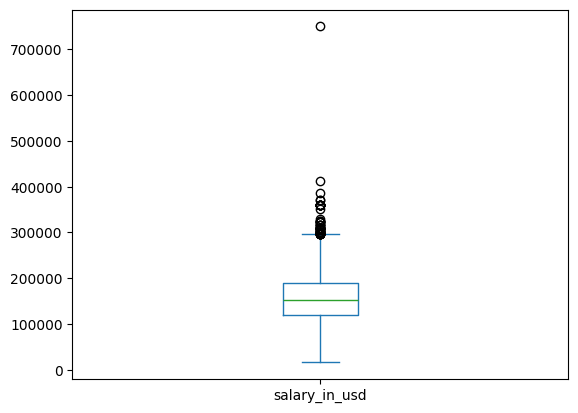

In [10]:
# O IQR de salary_in_usd será de Q3 - Q1 = 70905.75
df_data_scientist[['salary_in_usd']].plot(kind='box');

q1_salary = np.percentile(df_data_scientist['salary_in_usd'], 25)
q3_salary = np.percentile(df_data_scientist['salary_in_usd'], 75)
iqr_salary = q3_salary - q1_salary
iqr_salary


In [11]:
# Mínimo esperado
q1_salary - (iqr_salary * 1.5) 

12735.625

In [12]:
# Máximo esperado
q3_salary + (iqr_salary * 1.5) 

296358.625

Neste caso, vamos identificar os outliers onde qualquer dado que estiver fora de Q3+1.5*IQR ou Q1-1.5*IQR será considerado um *outlier*.

**Minimo = 12735.625**

**Máximo = 296358.625**

### 4.2. Identificando e retirando os outliers query

In [13]:
df_sem_outliers = df_data_scientist[(df_data_scientist['salary_in_usd'] <= 296358) & (df_data_scientist['salary_in_usd'] >= 12735)]
df_sem_outliers


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
12,Data Scientist,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
13,Data Scientist,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
16,Data Scientist,Mid-level,Full-time,On-site,2024,United States,85000,USD,85000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
11072,Data Scientist,Mid-level,Full-time,Remote,2020,Spain,34000,EUR,38776,Spain,Medium
11075,Data Scientist,Entry-level,Full-time,On-site,2020,Germany,43200,EUR,49268,Germany,Small
11079,Data Scientist,Mid-level,Full-time,On-site,2020,Germany,70000,EUR,79833,Germany,Large
11080,Data Scientist,Entry-level,Full-time,Hybrid,2020,Germany,55000,EUR,62726,Germany,Small


### 4.3. Tipos de modelo de trabalho
Nesta fase vamos procurar a maior quantidade de pessoas em um modelo de trabalho para identificarmos onde estão nossas oportunidades de contratação

In [14]:
# Identificando a porcentagem
df_sem_outliers['employment_type'].value_counts() / len(df_sem_outliers) * 100

employment_type
Full-time    99.732023
Part-time     0.223314
Freelance     0.044663
Name: count, dtype: float64

### 5. Análise de Dados Categóricos


Explorar dados categóricos (tipo de emprego, localização, etc).

Verificar a distribuição de categorias especificando os dados que queremos analisar. 

Agora que identificamos o perfil de tipo de trabalho que queremos, vamos filtrar apenas quem se encaixa no padrão

### 5.1. Modelo Full-time

In [15]:
df_full_data = df_sem_outliers[df_sem_outliers['employment_type'] == 'Full-time']
df_full_data

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
12,Data Scientist,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
13,Data Scientist,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
16,Data Scientist,Mid-level,Full-time,On-site,2024,United States,85000,USD,85000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
11072,Data Scientist,Mid-level,Full-time,Remote,2020,Spain,34000,EUR,38776,Spain,Medium
11075,Data Scientist,Entry-level,Full-time,On-site,2020,Germany,43200,EUR,49268,Germany,Small
11079,Data Scientist,Mid-level,Full-time,On-site,2020,Germany,70000,EUR,79833,Germany,Large
11080,Data Scientist,Entry-level,Full-time,Hybrid,2020,Germany,55000,EUR,62726,Germany,Small


In [16]:
# Agrupando os dados de tipo de trabalho e salário
df_full_data.groupby('employment_type')[['salary_in_usd']].describe()

salary_in_usd                                                  \
                        count           mean           std      min       25%   
employment_type                                                                 
Full-time              2233.0  151201.535602  55556.941071  16000.0  117400.0   

                                               
                      50%       75%       max  
employment_type                                
Full-time        150000.0  185900.0  296100.0

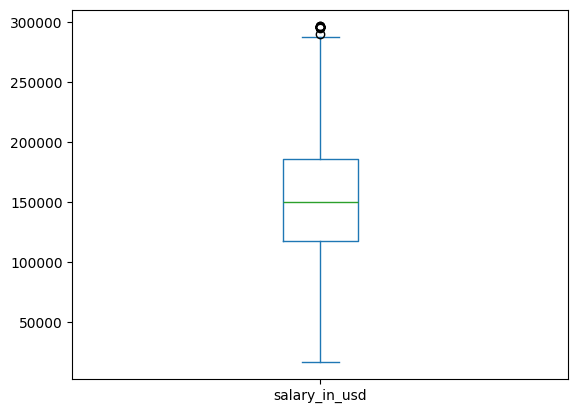

In [17]:
# Agora temos o boxplot com os dados ajustados para verificar se ainda há algum outlier nos nossos dados
df_full_data[['salary_in_usd']].plot(kind='box');

### 6. Análise Multivariada

Correlações entre variáveis contínuas com `df.corr()`:

In [18]:
# Aqui vamos que se seu df possuir poucos valores numéricos, o corr() não terá uma boa relevância
df_full_data.corr(numeric_only=True)

,work_year,salary,salary_in_usd
work_year,1.000000,-0.122524,0.207138
salary,-0.122524,1.000000,-0.023928
salary_in_usd,0.207138,-0.023928,1.000000


Análises de agrupamento, como média de salário por experiência ou localização, usando `df.groupby()`:

In [19]:
# Verificando a média salariál por nível de experiência
df_full_data.groupby('experience_level')[['salary_in_usd']].mean().sort_values(by='salary_in_usd', ascending=True)

,salary_in_usd
experience_level,
Entry-level,85773.673077
Mid-level,117136.290541
Senior-level,163916.714631
Executive-level,180187.354839


Agora podemos visualizar a variação salarial de acordo com o nível de experiência:

C:\Users\letic\AppData\Local\Temp\ipykernel_15700\1145355525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_data['experience_level'] = pd.Categorical(df_full_data['experience_level'], categories=experience_order, ordered=True)


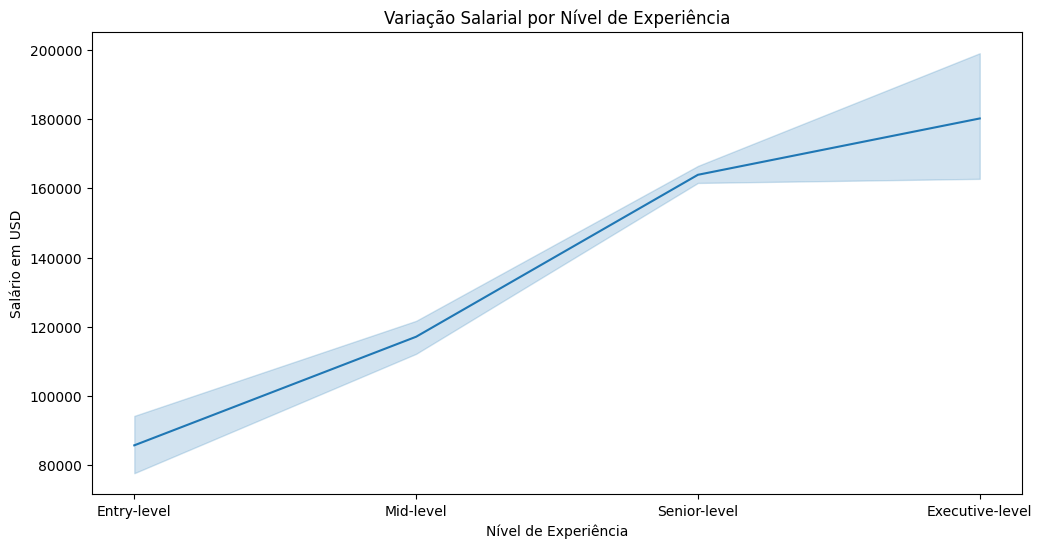

In [20]:
experience_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

df_full_data['experience_level'] = pd.Categorical(df_full_data['experience_level'], categories=experience_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='experience_level', y='salary_in_usd', data=df_full_data)
plt.title('Variação Salarial por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.show()

 6.1 Agora vamos verificar a correlação entre os países onde o funcionario está localizado e o salários
 

In [21]:
country_to_continent = {
    'New Zealand': 'Oceania',
    'United States': 'North America',
    'Canada': 'North America',
    'Australia': 'Oceania',
    'Switzerland': 'Europe',
    'Singapore': 'Asia',
    'Ireland': 'Europe',
    'United Kingdom': 'Europe',
    'Norway': 'Europe',
    'Netherlands': 'Europe',
    'Austria': 'Europe',
    'Portugal': 'Europe',
    'Germany': 'Europe',
    'Belgium': 'Europe',
    'Hong Kong': 'Asia',
    'Brazil': 'South America',
    'Cyprus': 'Europe',
    'Latvia': 'Europe',
    'France': 'Europe',
    'Romania': 'Europe',
    'Andorra': 'Europe',
    'Nigeria': 'Africa',
    'Russia': 'Europe',
    'Philippines': 'Asia',
    'Spain': 'Europe',
    'Greece': 'Europe',
    'Chile': 'South America',
    'Uzbekistan': 'Asia',
    'Japan': 'Asia',
    'Poland': 'Europe',
    'India': 'Asia',
    'Mexico': 'North America',
    'Hungary': 'Europe',
    'Turkey': 'Asia',
    'Italy': 'Europe',
    'Serbia': 'Europe',
    'Thailand': 'Asia',
    'Ecuador': 'South America'
}
df_full_data['continent'] = df_full_data['employee_residence'].map(country_to_continent)

# Agrupando por continente e calculando a média do salário
average_salary_by_continent = df_full_data.groupby('continent')[['salary_in_usd']].mean().sort_values(by='salary_in_usd', ascending=False)

# Exibindo os resultados
# print(average_salary_by_continent)
average_salary_by_continent

C:\Users\letic\AppData\Local\Temp\ipykernel_15700\3012591366.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_data['continent'] = df_full_data['employee_residence'].map(country_to_continent)


,salary_in_usd
continent,
North America,160591.387437
Oceania,132616.875000
Europe,76852.717073
South America,52324.666667
Africa,50000.000000
Asia,38107.739130


### 7. Conclusões e Próximos Passos



Verificando a quantidade de Cientistas de Dados disponíveis em cada continente:

In [22]:
df_full_data['continent'].value_counts()

continent
North America    1990
Europe            205
Asia               23
Oceania             8
South America       6
Africa              1
Name: count, dtype: int64

Verificando a quantidade de Cientistas de Dados disponíveis em cada continente, agrupados por experiência:

In [42]:
df_full_data.groupby(['continent', 'experience_level'], observed=False).size().reset_index(name='count')

,continent,experience_level,count
0,Africa,Entry-level,0
1,Africa,Mid-level,1
2,Africa,Senior-level,0
3,Africa,Executive-level,0
4,Asia,Entry-level,8
5,Asia,Mid-level,13
6,Asia,Senior-level,2
7,Asia,Executive-level,0
8,Europe,Entry-level,22
9,Europe,Mid-level,94


## Salário custo benefício
### Data Scientist Mid-Level

Após cálculo da variação salarial de acordo com o nível de experiência, concluí-se que o funcionário de nível pleno de melhor custo/benefício está localizado na Ásia 

In [39]:
# filtrando por região e experiência para encontrar um cientista pleno com o melhor custo/benefício
df_custo_beneficio = df_full_data.pivot_table(index='continent', columns='experience_level', values='salary_in_usd', aggfunc='mean')
df_custo_beneficio.sort_values(by='Mid-level', ascending=False)


experience_level,Entry-level,Mid-level,Senior-level,Executive-level
continent,,,,
North America,103162.309859,133078.512121,168648.642354,182253.846154
Oceania,83171.000000,99887.000000,169525.750000,NaN
Europe,55140.272727,74749.606383,79381.547619,169441.600000
South America,17955.000000,59346.000000,100000.000000,NaN
Africa,NaN,50000.000000,NaN,NaN
Asia,32971.375000,41418.615385,37132.500000,NaN


In [40]:
df_custo_beneficio['Mid-level']

continent
Africa            50000.000000
Asia              41418.615385
Europe            74749.606383
North America    133078.512121
Oceania           99887.000000
South America     59346.000000
Name: Mid-level, dtype: float64

### Data Scientist Entry-level
Após cálculo da variação salarial de acordo com o nível de experiência, concluí-se que o funcionário de nível júnior de melhor custo/benefício está localizado na Ásia :

In [43]:
df_custo_beneficio = df_full_data.pivot_table(index='continent', columns='experience_level', values='salary_in_usd', aggfunc='mean')
df_custo_beneficio.sort_values(by='Entry-level', ascending=False)

experience_level,Entry-level,Mid-level,Senior-level,Executive-level
continent,,,,
North America,103162.309859,133078.512121,168648.642354,182253.846154
Oceania,83171.000000,99887.000000,169525.750000,NaN
Europe,55140.272727,74749.606383,79381.547619,169441.600000
Asia,32971.375000,41418.615385,37132.500000,NaN
South America,17955.000000,59346.000000,100000.000000,NaN
Africa,NaN,50000.000000,NaN,NaN


In [44]:
df_custo_beneficio['Entry-level']

continent
Africa                     NaN
Asia              32971.375000
Europe            55140.272727
North America    103162.309859
Oceania           83171.000000
South America     17955.000000
Name: Entry-level, dtype: float64

### Data Scientist Senior-level
Após cálculo da variação salarial de acordo com o nível de experiência, concluí-se que o funcionário de nível Senior de melhor custo/benefício está localizado na Ásia :

In [46]:
df_custo_beneficio = df_full_data.pivot_table(index='continent', columns='experience_level', values='salary_in_usd', aggfunc='mean')
df_custo_beneficio.sort_values(by='Senior-level', ascending=False)

experience_level,Entry-level,Mid-level,Senior-level,Executive-level
continent,,,,
Oceania,83171.000000,99887.000000,169525.750000,NaN
North America,103162.309859,133078.512121,168648.642354,182253.846154
South America,17955.000000,59346.000000,100000.000000,NaN
Europe,55140.272727,74749.606383,79381.547619,169441.600000
Asia,32971.375000,41418.615385,37132.500000,NaN
Africa,NaN,50000.000000,NaN,NaN


In [47]:
df_custo_beneficio['Senior-level']

continent
Africa                     NaN
Asia              37132.500000
Europe            79381.547619
North America    168648.642354
Oceania          169525.750000
South America    100000.000000
Name: Senior-level, dtype: float64

### Data Scientist Executive-level
Após cálculo da variação salarial de acordo com o nível de experiência, concluí-se que o funcionário de nível executivo de melhor custo/benefício está localizado na Europa:

In [48]:
df_custo_beneficio = df_full_data.pivot_table(index='continent', columns='experience_level', values='salary_in_usd', aggfunc='mean')
df_custo_beneficio.sort_values(by='Executive-level', ascending=False)

experience_level,Entry-level,Mid-level,Senior-level,Executive-level
continent,,,,
North America,103162.309859,133078.512121,168648.642354,182253.846154
Europe,55140.272727,74749.606383,79381.547619,169441.600000
Africa,NaN,50000.000000,NaN,NaN
Asia,32971.375000,41418.615385,37132.500000,NaN
Oceania,83171.000000,99887.000000,169525.750000,NaN
South America,17955.000000,59346.000000,100000.000000,NaN


In [49]:
df_custo_beneficio['Executive-level']

continent
Africa                     NaN
Asia                       NaN
Europe           169441.600000
North America    182253.846154
Oceania                    NaN
South America              NaN
Name: Executive-level, dtype: float64

### Conclusões finais: 

Existe uma variação significativa nos salários entre um Cientista de Dados de nível executivo e um de nível sênior, sendo €169.441,60 para o executivo na Europa e €37.132,50 para o sênior na Ásia.

Assim, dado o custo potencialmente mais elevado de contratação do profissional de nível executivo, a recomendação é investir em profissionais de nível sênior e fornecer capacitações adicionais.

A lógica por trás dessa recomendação é que, embora a média salarial para profissionais sênior seja mais baixa, a oferta desses profissionais é maior. Portanto, ao investir em treinamento e desenvolvimento para os profissionais de nível sênior, as empresas podem desenvolver uma equipe altamente qualificada e experiente que, eventualmente, possa assumir funções de liderança ou executivas. No entanto, é importante considerar outros fatores como a disponibilidade de talentos, a cultura da empresa e as especificidades do papel executivo.


Ao analisar a viabilidade salarial de um cargo em diferentes países, é crucial considerar diversos fatores para obter uma compreensão abrangente da situação. Embora a pesquisa de dados salariais seja fundamental, é igualmente importante converter os salários para uma moeda comum, avaliar o custo de vida em cada país, analisar benefícios adicionais, levar em conta as implicações fiscais, avaliar oportunidades de avanço profissional, comparar condições de trabalho, consultar profissionais do setor e considerar indicadores econômicos. No entanto, é evidente que nossos dados atuais podem não ser suficientes para uma análise completa. A inclusão de variáveis adicionais, como qualidade de vida, oportunidades de crescimento, cultura e estilo de vida, seria crucial para uma decisão informada sobre aceitar uma oferta de emprego em um país específico.